In [9]:
!pip install factor_analyzer

     |████████████████████████████████| 40kB 1.8MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40380 sha256=5a90e777e7e61ce4827ff33fe2b8724e732980e5408834eba789bb5e71aa2c6c
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


##Chocolate

In [10]:
import pandas as pd

questions = ['How much chocolate do you eat?', 
             'How much do you like chocolate?',
             'How often do you eat desserts?',  
             'How much sports do you do?', 
             'How much running do you do?']

K = [[1, 1, 1, 10, 8],
     [2, 2, 1, 8, 7],
     [4, 4, 5, 8, 8],  
     [6, 6, 5, 10, 9], 
     [8, 9, 8, 10, 10],
     [10, 10, 8, 2, 2],
     [9, 8, 8, 1, 2]]

K = pd.DataFrame(K)
K.columns = questions
K

,How much chocolate do you eat?,How much do you like chocolate?,How often do you eat desserts?,How much sports do you do?,How much running do you do?
0,1,1,1,10,8
1,2,2,1,8,7
2,4,4,5,8,8
3,6,6,5,10,9
4,8,9,8,10,10
5,10,10,8,2,2
6,9,8,8,1,2


In [11]:
K.columns

Index(['How much chocolate do you eat?', 'How much do you like chocolate?',
       'How often do you eat desserts?', 'How much sports do you do?',
       'How much running do you do?'],
      dtype='object')

In [12]:
import numpy as np

X_ds = K['How much chocolate do you eat?']
y_ds = K['How much do you like chocolate?']

print(np.corrcoef(X_ds, y_ds))

[[1.         0.98638132]
 [0.98638132 1.        ]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


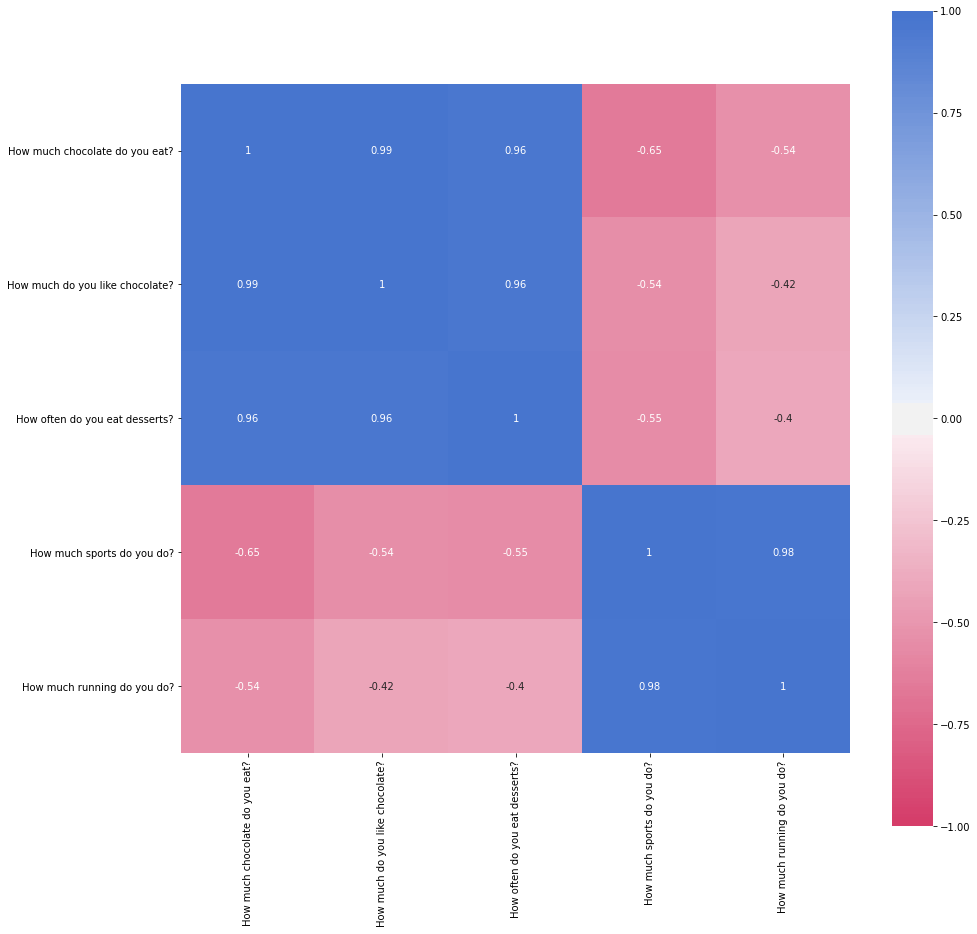

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = K.corr()
fig, ax = plt.subplots(figsize=(15,15))
#If you want to Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=np.bool))
#ax.set_facecolor((.21875, .21875, .21875))
#I choose not to because I can see the strength of the correlation across all variables
ax = sns.heatmap(
corr,
#mask=mask,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(0, 256, n=200),
square=True,
ax=ax,
annot=True
)

In [14]:
  #adequancy test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

#Bartlett's Test
chi_square_value,p_value=calculate_bartlett_sphericity(K)
print("Bartlett's Test\t\t", chi_square_value, p_value)

#Kaiser-Meyer-Oklin Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(K)
print("Kaiser-Meyer-Oklin Test\t", kmo_model)

Bartlett's Test		 46.50957680642777 4.845984827487528e-07
Kaiser-Meyer-Oklin Test	 0.5609324783523286


In [15]:
  #choosing number of factors
from factor_analyzer.factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation=None)
fa.n_factors = 7 #anche se cambio n_factors eigen resta invariato
fa.fit(K)

#check Eigenvalues
ev, v = fa.get_eigenvalues()
ev
#6 factors are > 1: number of factors is 6

array([3.82130818e+00, 1.12100002e+00, 4.93236990e-02, 4.60575471e-03,
       3.76234908e-03])

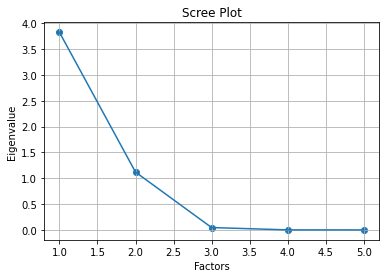

In [16]:
# Create scree plot using matplotlib
import matplotlib.pyplot as plt

plt.scatter(range(1,K.shape[1]+1),ev)
plt.plot(range(1,K.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [17]:
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer(rotation="varimax")
fa.n_factors = 2
fa

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=2, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [18]:
fa.fit(K)
fa.loadings_

array([[ 0.93039404, -0.36384281],
       [ 0.96447125, -0.23574802],
       [ 0.94287226, -0.23428363],
       [-0.34071538,  0.93051698],
       [-0.19221504,  0.97928564]])

In [19]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis

#X, _ = load_digits(return_X_y=True)
transformer = FactorAnalysis(n_components=2, random_state=0)
X_transformed = transformer.fit_transform(K.transpose())

X_transformed = pd.DataFrame(X_transformed)
X_transformed

,0,1
0,-0.981981,-0.671431
1,-0.981981,-0.673716
2,-0.436436,1.793529
3,1.200198,-0.847317
4,1.200198,0.398934


In [20]:
fa.get_factor_variance()
#98% of the variance is explained through the use of 2 factors

(array([2.83787956, 2.06770975]),
 array([0.56757591, 0.41354195]),
 array([0.56757591, 0.98111786]))

##Big5

Tutorial from: https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [21]:
X = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/20200520_Factor Analysis/BIg_5.csv')
X.columns
X = X.drop(['Unnamed: 0', 'gender', 'education', 'age'], axis=1)
X.shape
X = X.dropna()
X

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,4.0,3.0,5.0,2.0,3.0,1.0,5.0,6.0,5.0,5.0,6.0,6.0,1,4.0,5.0,2.0
2794,5.0,5.0,5.0,5.0,3.0,5.0,4.0,2.0,3.0,5.0,3.0,5.0,5.0,6.0,5.0,4.0,5.0,3.0,5.0,2.0,6.0,1,5.0,6.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [22]:
  #adequancy test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

#Bartlett's Test
chi_square_value,p_value=calculate_bartlett_sphericity(X)
print("Bartlett's Test\t\t", chi_square_value, p_value)

#Kaiser-Meyer-Oklin Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)
print("Kaiser-Meyer-Oklin Test\t", kmo_model)

Bartlett's Test		 18170.96635086924 0.0
Kaiser-Meyer-Oklin Test	 0.848539722194922


In [23]:
  #choosing number of factors
from factor_analyzer.factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation=None)
fa.fit(X, 2)
#check Eigenvalues
ev, v = fa.get_eigenvalues()
ev
#6 factors are > 1: number of factors is 6

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

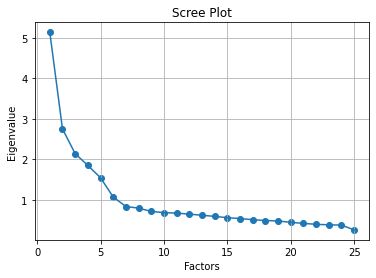

In [24]:
# Create scree plot using matplotlib
import matplotlib.pyplot as plt

plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [25]:
# Create factor analysis object and perform factor analysis using 5 factors
from factor_analyzer.factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(rotation="varimax")
fa

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [26]:
#default ha 3 n_factors, siccome non possiamo cambiarli in fit dobbiamo
#applicare il cambiamento direttamente a fa
fa.n_factors = 5
fa.fit(X)
#non se se è un bug, ma l'attributo sul sito è loadings, per non causare errore bisogna aggiungere il suffisso _

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=5, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [27]:
fa.loadings_

array([[ 0.11112641,  0.04046493,  0.02279796, -0.42816554, -0.07793074],
       [ 0.029588  ,  0.21371606,  0.13903739,  0.62694553,  0.06213921],
       [ 0.00935691,  0.31784809,  0.10933115,  0.65074261,  0.05619584],
       [-0.06647574,  0.20456624,  0.23058374,  0.43562383, -0.1127004 ],
       [-0.12211317,  0.39303367,  0.08786921,  0.53708686,  0.0667076 ],
       [ 0.01041556,  0.07018423,  0.54582379,  0.03887794,  0.20958365],
       [ 0.08957412,  0.0332704 ,  0.64873118,  0.10278247,  0.11543389],
       [-0.03085502,  0.02390651,  0.55703585,  0.11157762, -0.00518271],
       [ 0.24041008, -0.06498371, -0.63380555, -0.03749823, -0.107535  ],
       [ 0.29031777, -0.1763948 , -0.56246672, -0.04752477,  0.03682235],
       [ 0.04281888, -0.5748346 ,  0.03314352, -0.10481258, -0.05879528],
       [ 0.24474268, -0.67873071, -0.10248265, -0.11251716, -0.04200997],
       [ 0.02418041,  0.53681627,  0.08301031,  0.2579065 ,  0.28087733],
       [-0.11561383,  0.64683266,  0.1

In [28]:
#trasformiamo in dati comprensibili
factors = pd.DataFrame(fa.loadings_.transpose())
factors.columns = X.columns
factors.transpose()

,0,1,2,3,4
A1,0.111126,0.040465,0.022798,-0.428166,-0.077931
A2,0.029588,0.213716,0.139037,0.626946,0.062139
A3,0.009357,0.317848,0.109331,0.650743,0.056196
A4,-0.066476,0.204566,0.230584,0.435624,-0.112700
A5,-0.122113,0.393034,0.087869,0.537087,0.066708
C1,0.010416,0.070184,0.545824,0.038878,0.209584
C2,0.089574,0.033270,0.648731,0.102782,0.115434
C3,-0.030855,0.023907,0.557036,0.111578,-0.005183
C4,0.240410,-0.064984,-0.633806,-0.037498,-0.107535
C5,0.290318,-0.176395,-0.562467,-0.047525,0.036822


In [31]:
# Get variance of each factors
fv = pd.DataFrame(fa.get_factor_variance()).transpose()
fv.columns = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fv.transpose()

#factor_names = ['Factor '+str(x) for x in range(1, 4)] provato a rinominare le colonne, riguardare 
#fv.columns = factor_names
fa.get_factor_variance()

(array([2.70963262, 2.47308982, 2.04110563, 1.844498  , 1.52215296]),
 array([0.1083853 , 0.09892359, 0.08164423, 0.07377992, 0.06088612]),
 array([0.1083853 , 0.2073089 , 0.28895312, 0.36273304, 0.42361916]))